In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('phone.csv')

In [4]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
pd.set_option('display.max_columns',None)

In [6]:
data.shape

(3333, 21)

In [7]:
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum()>=1]

In [9]:
features_with_na

[]

In [12]:
numeric_features = [feature for feature in data.columns if data[feature].dtype!='O']
print('Length of num_feat is',len(numeric_features))

Length of num_feat is 17


In [13]:
categoric_features = [feature for feature in data.columns if data[feature].dtype=='O']
print('Length of cat_feat is',len(categoric_features))

Length of cat_feat is 4


In [14]:
data[numeric_features].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
data[categoric_features].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


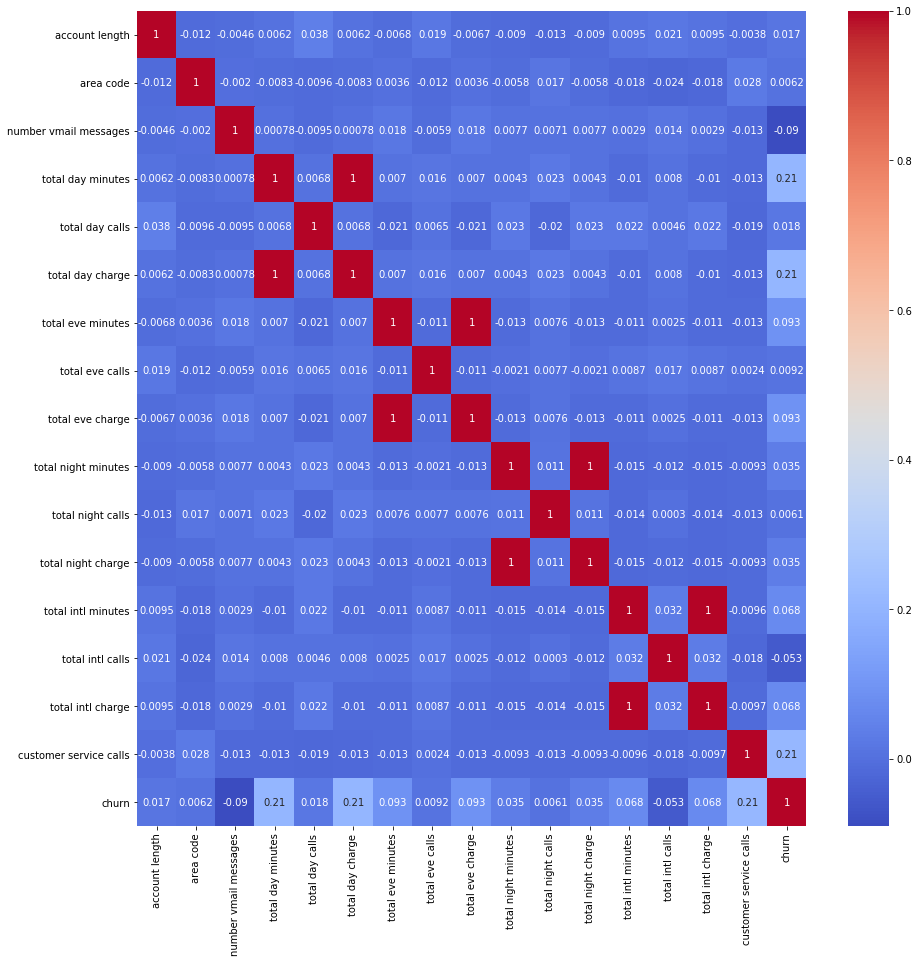

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data[numeric_features].corr(),cmap='coolwarm',annot=True)

In [17]:
import scipy.stats as stats
churn_group = data.groupby('churn')

In [18]:
true_group = churn_group.get_group(True).iloc[:,4:]
false_group = churn_group.get_group(False).iloc[:,4:]

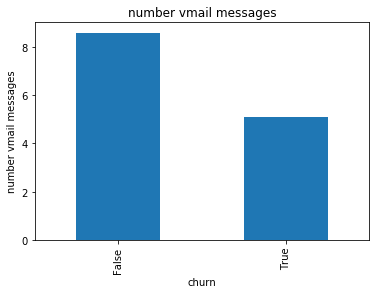

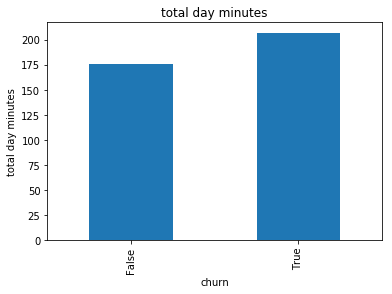

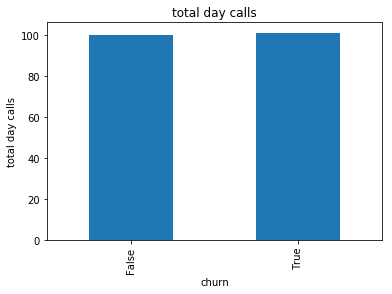

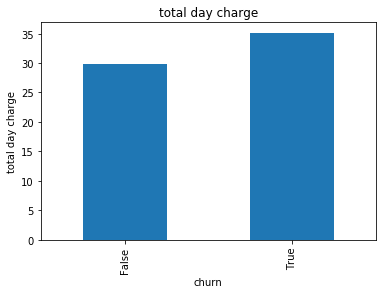

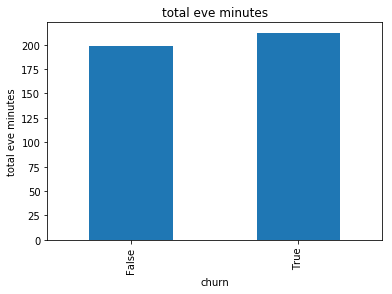

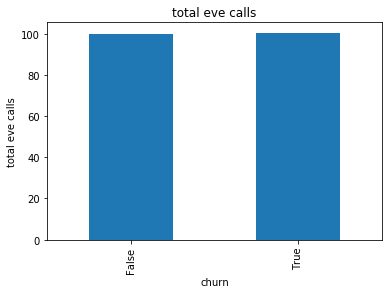

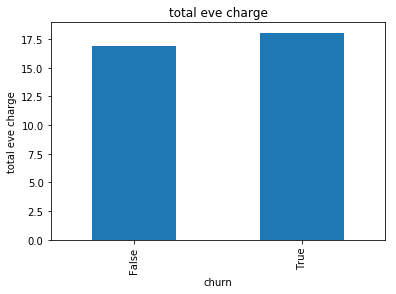

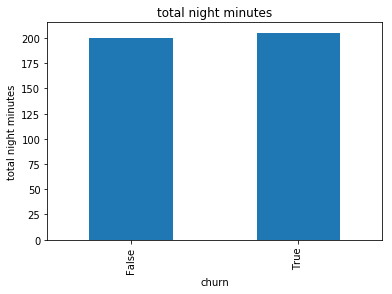

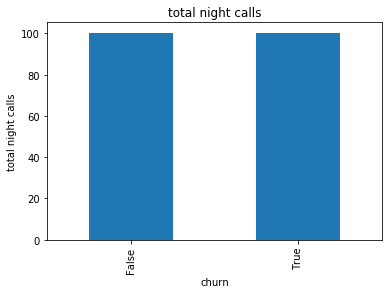

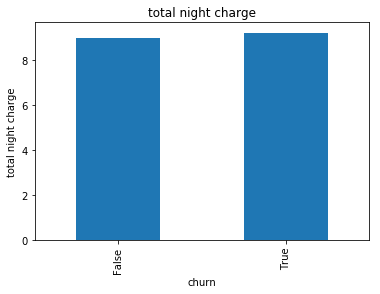

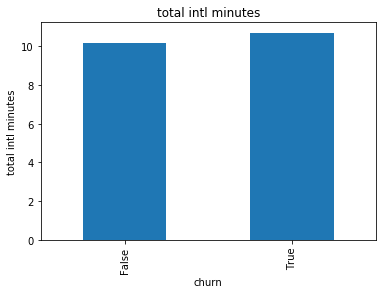

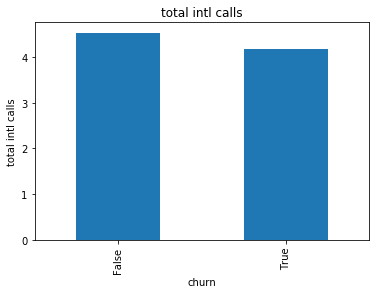

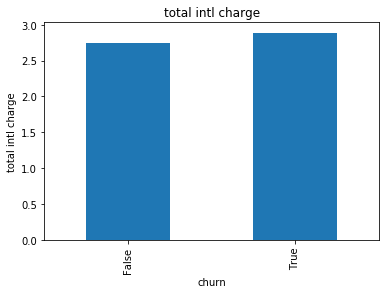

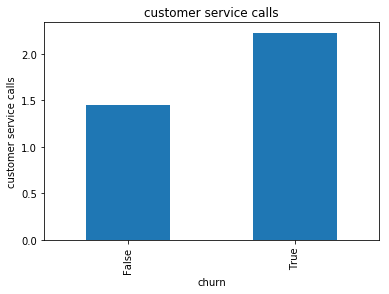

In [20]:
for i in numeric_features[2:-1]:
    plt.subplots()
    churn_group[i].mean().plot.bar()
    plt.ylabel(i)
    plt.title(i)

In [22]:
discrete_features = [feature for feature in numeric_features if len(data[feature].unique())<=25]

In [23]:
discrete_features

['area code', 'total intl calls', 'customer service calls', 'churn']

In [24]:
for i in discrete_features:
    print(i,data[i].unique())

area code [415 408 510]
total intl calls [ 3  5  7  6  4  2  9 19  1 10 15  8 11  0 12 13 18 14 16 20 17]
customer service calls [1 0 2 3 4 5 7 9 6 8]
churn [False  True]


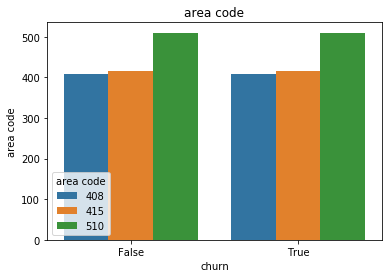

In [29]:
for i in discrete_features[0:1]:
    dataset = data.copy()
    plt.subplots()
    sns.barplot(data=dataset,x='churn',y=i,hue=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

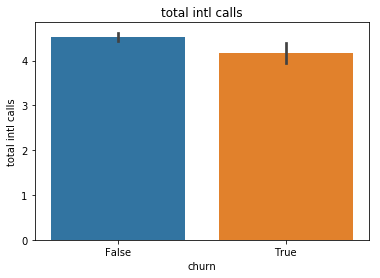

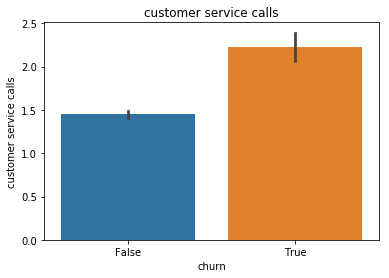

In [32]:
for i in discrete_features[1:-1]:
    dataset = data.copy()
    plt.subplots()
    sns.barplot(data=dataset,x='churn',y=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

In [40]:
data.groupby('churn')['state'].value_counts()[0]

state
WV    96
AL    72
VA    72
WI    71
MN    69
NY    68
OH    68
WY    68
OR    67
VT    65
ID    64
CT    62
IN    62
UT    62
AZ    60
RI    59
CO    57
KS    57
MI    57
NC    57
MO    56
ND    56
NE    56
NM    56
FL    55
MA    54
MT    54
TX    54
IL    53
MD    53
DE    52
NV    52
OK    52
SD    52
WA    52
KY    51
MS    51
HI    50
NJ    50
AK    49
DC    49
ME    49
TN    48
LA    47
NH    47
GA    46
SC    46
AR    44
IA    41
PA    37
CA    25
Name: state, dtype: int64

Text(0.5, 1.0, 'Churn')

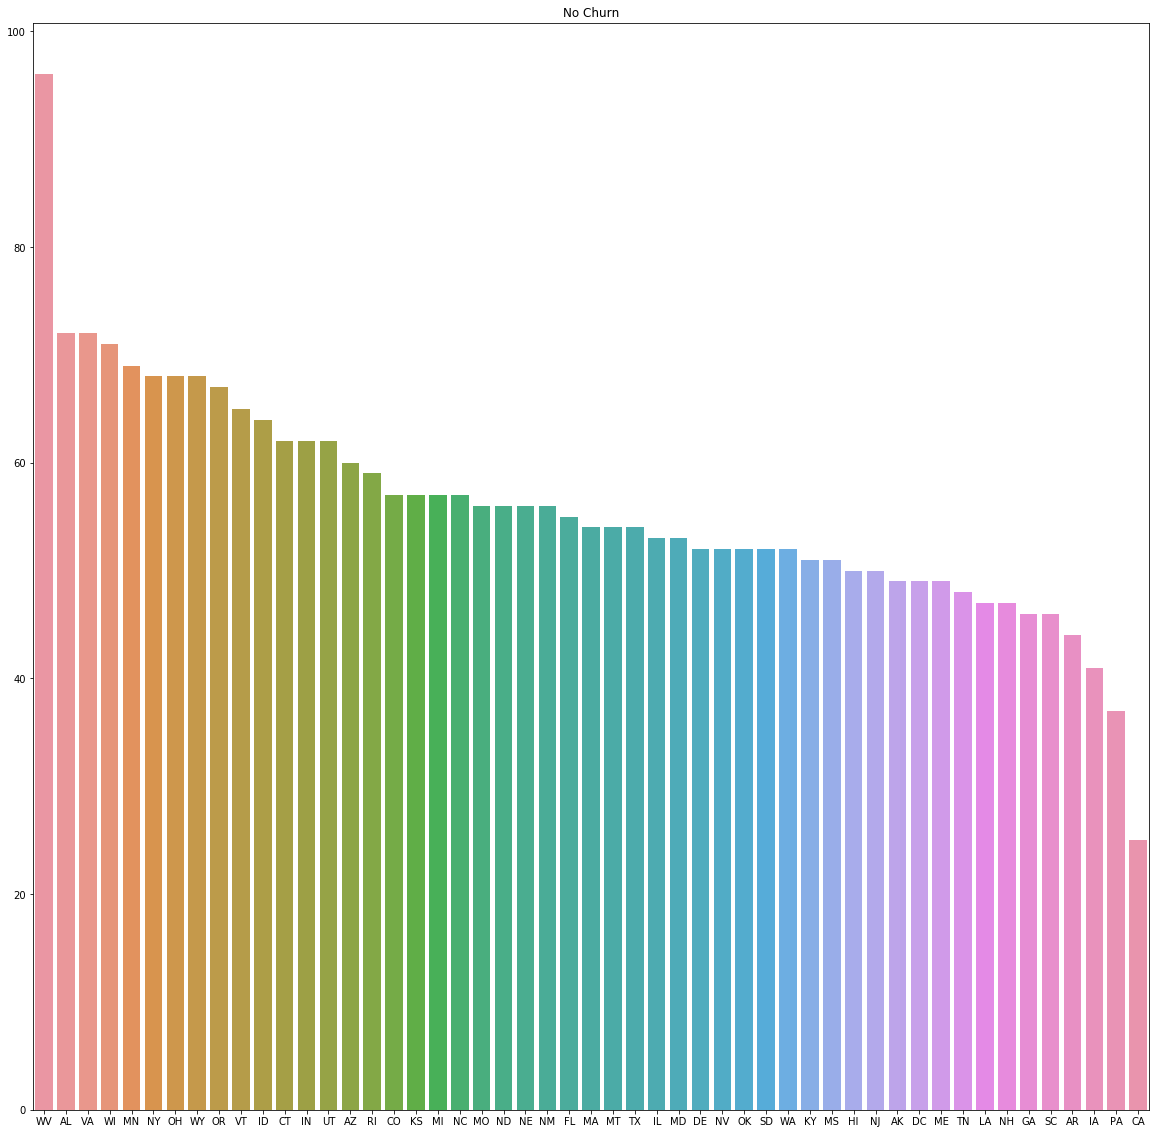

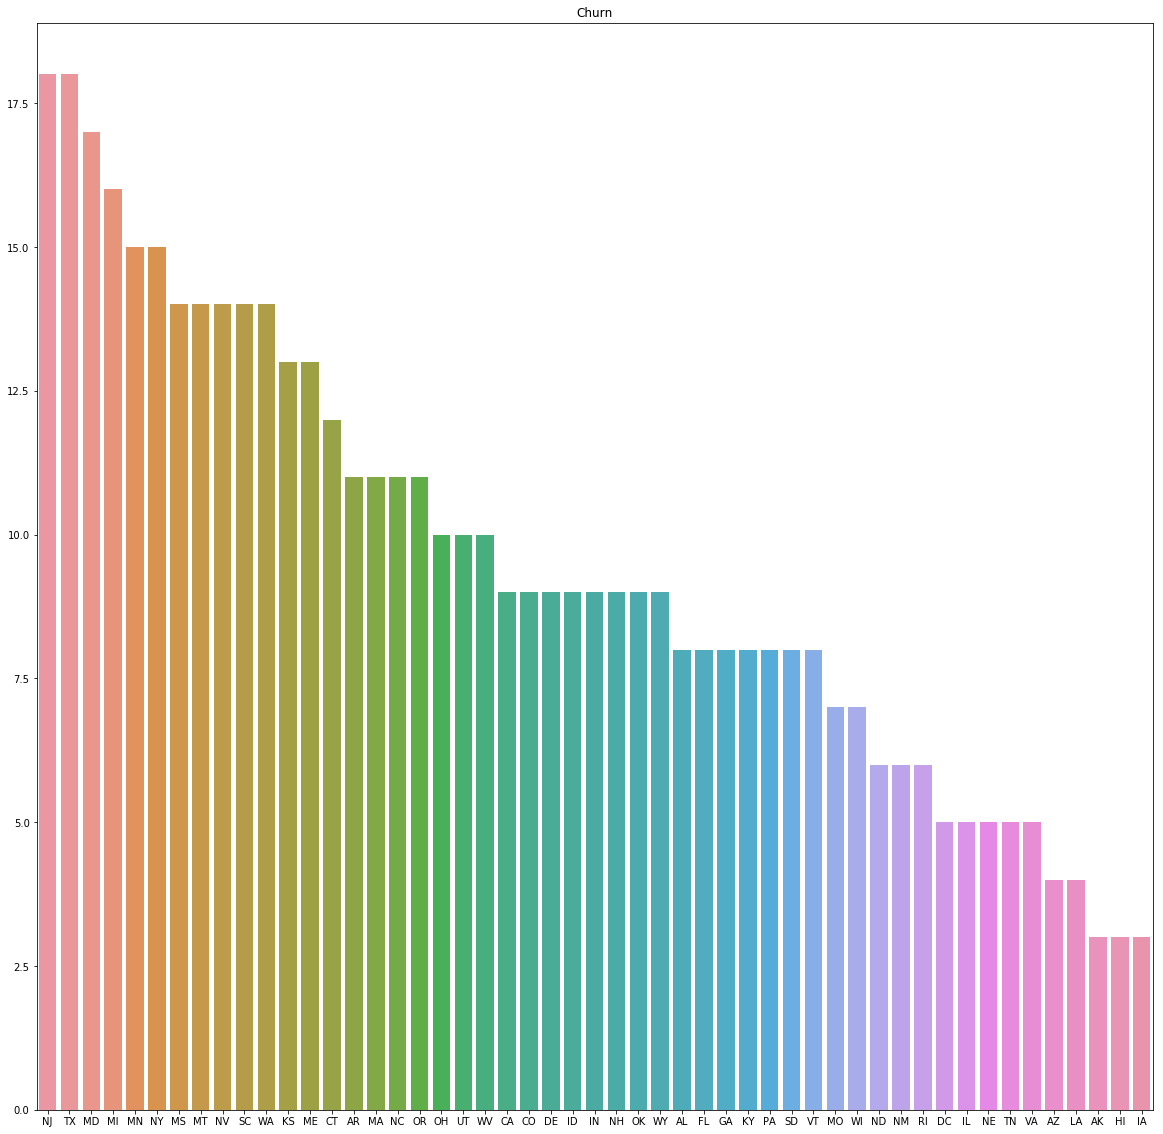

In [37]:
# len(data.state.unique())
false = dict(data.groupby('churn')['state'].value_counts()[0])
true = dict(data.groupby('churn')['state'].value_counts()[1])
plt.figure(figsize=(20,20))
sns.barplot(x=list(false.keys()),y=list(false.values()))
plt.title('No Churn')
plt.figure(figsize=(20,20))
sns.barplot(x=list(true.keys()),y=list(true.values()))
plt.title('Churn')

In [41]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [42]:
continuous_features = [i for i in numeric_features if i not in discrete_features]
continuous_features

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl charge']

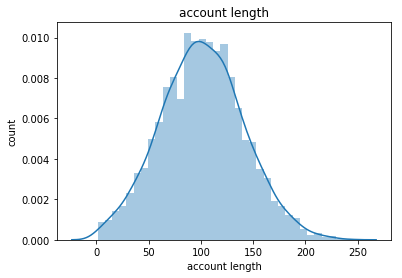

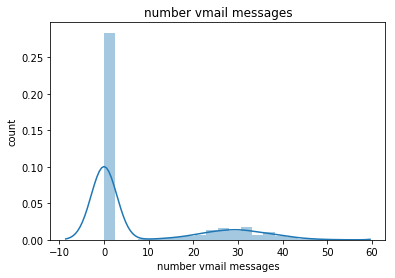

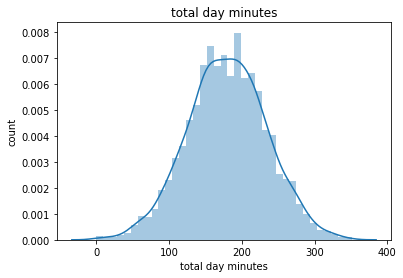

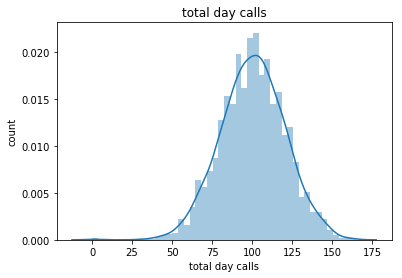

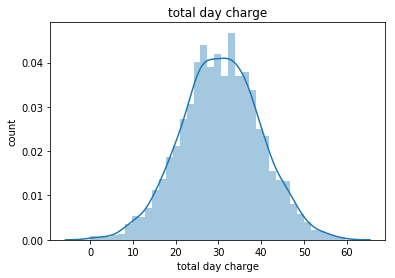

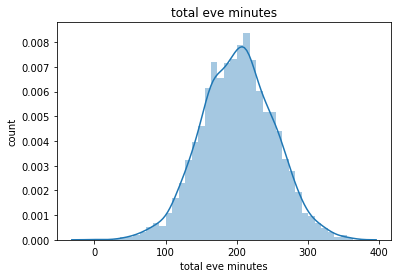

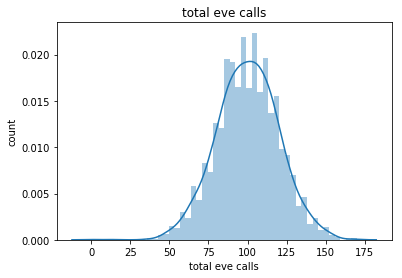

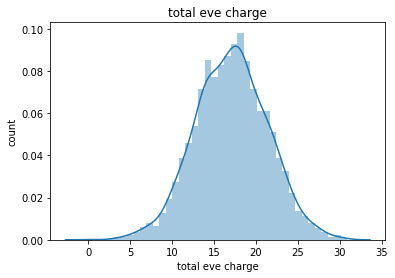

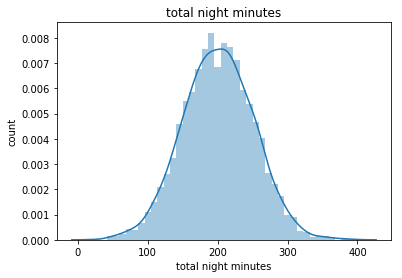

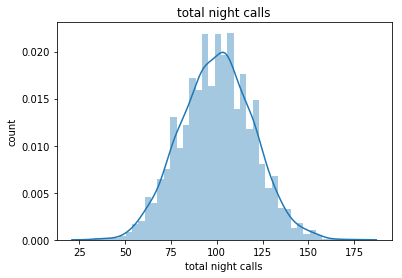

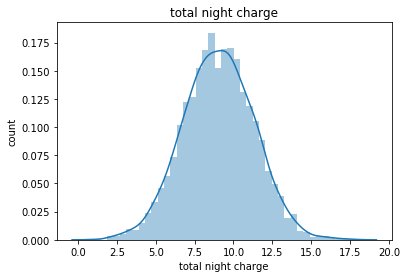

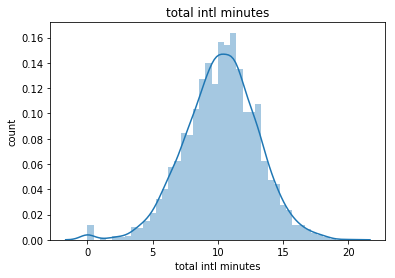

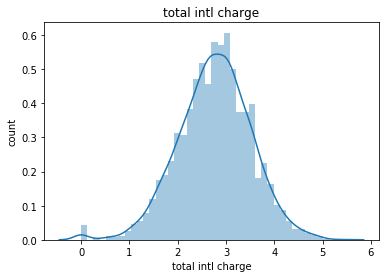

In [43]:
for i in continuous_features:
    dataset=data.copy
    sns.distplot(data[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(i)
    plt.show()

### Converting continuous features to log normal distribution and creating a predictive model

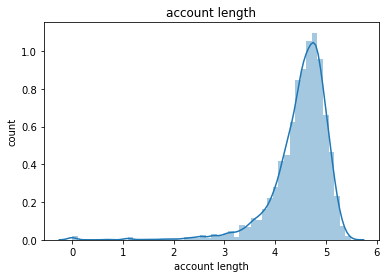

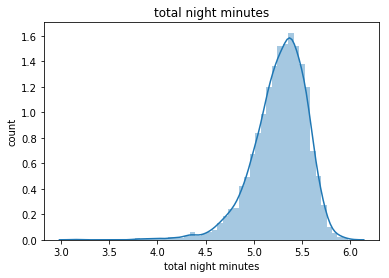

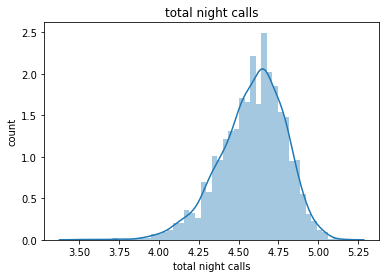

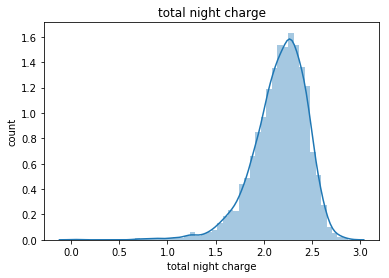

In [44]:
for i in continuous_features:
    dataset = data.copy()
    if 0 in dataset[i].unique():
        pass
    else:
        dataset[i] = np.log(dataset[i])
        sns.distplot(dataset[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.title(i)
        plt.show()

### Outliers

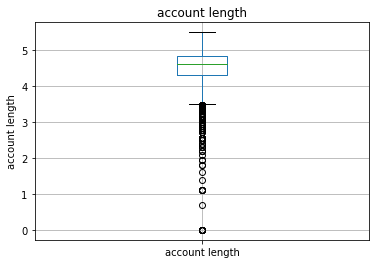

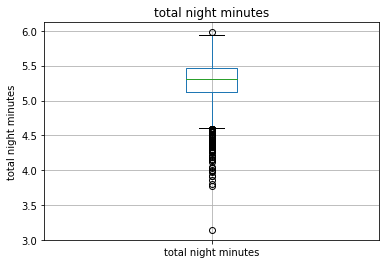

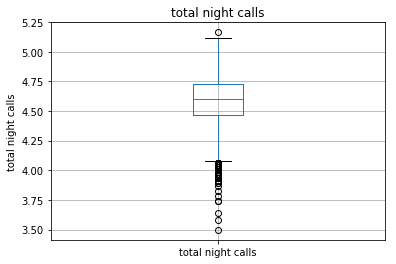

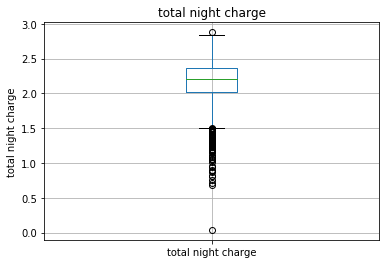

In [45]:
for i in continuous_features:
    dataset = data.copy()
    if 0 in dataset[i].unique():
        pass
    else:
        dataset[i] = np.log(dataset[i])
        dataset.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

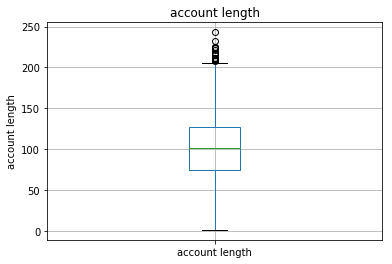

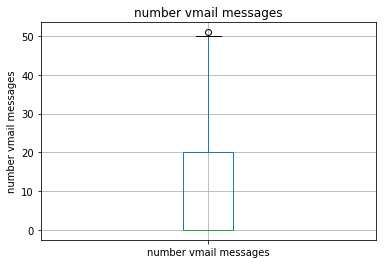

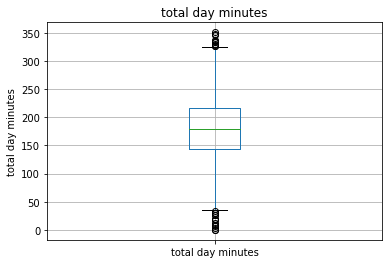

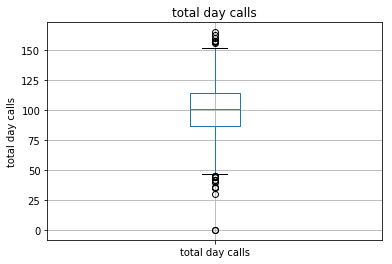

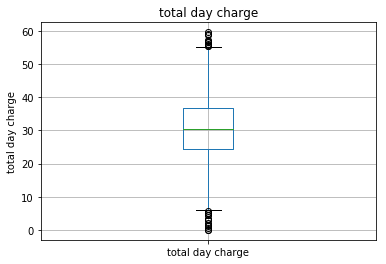

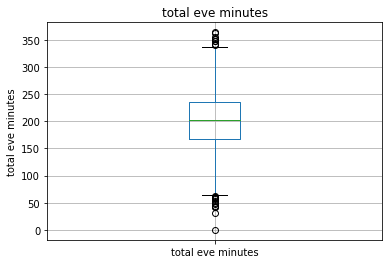

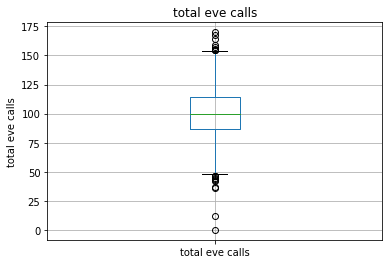

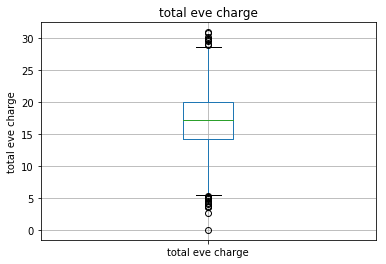

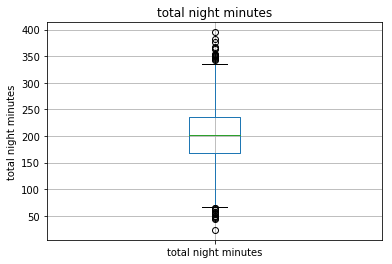

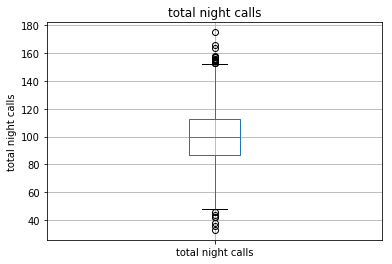

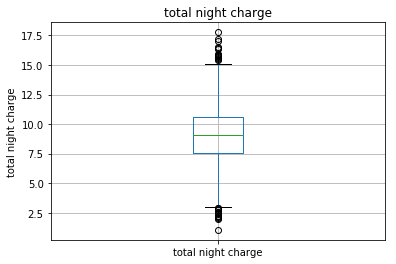

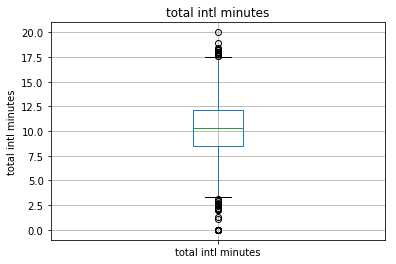

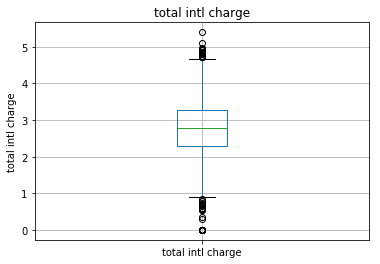

In [46]:
for i in continuous_features:
    data.boxplot(column=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

In [47]:
categoric_features

['state', 'phone number', 'international plan', 'voice mail plan']

In [48]:
for i in categoric_features:
    print('The feature is {} and categories are {}'.format(i,len(data[i].unique())))

The feature is state and categories are 51
The feature is phone number and categories are 3333
The feature is international plan and categories are 2
The feature is voice mail plan and categories are 2


In [49]:
data.drop('phone number',axis=1,inplace=True)

In [50]:
categoric_features = [i for i in data.columns if data[i].dtypes=='O']

In [51]:
categoric_features

['state', 'international plan', 'voice mail plan']

In [54]:
for i in categoric_features[1:]:
    dataset=data.copy()
    print(dataset.groupby('churn')[i].value_counts())

churn  international plan
False  no                    2664
       yes                    186
True   no                     346
       yes                    137
Name: international plan, dtype: int64
churn  voice mail plan
False  no                 2008
       yes                 842
True   no                  403
       yes                  80
Name: voice mail plan, dtype: int64


### Predictive Modelling

In [57]:
discrete_features

['area code', 'total intl calls', 'customer service calls', 'churn']

In [58]:
dataset = data.copy()

In [59]:
for i in categoric_features:
    temp = data.groupby(i)['churn'].count()/len(data)
    temp_df = temp[temp>0.01].index
    print(i,temp_df)
    data[i]=np.where(data[i].isin(temp_df),data[i],'Rare_var')

state Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')
international plan Index(['no', 'yes'], dtype='object', name='international plan')
voice mail plan Index(['no', 'yes'], dtype='object', name='voice mail plan')


In [60]:
data[numeric_features].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [61]:
feat_scal = [i for i in numeric_features if i not in ['area code']]

In [62]:
feat_scal

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

### Feature Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler as mms

In [64]:
scaler = mms()
scaler.fit(data[feat_scal])

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [65]:
scaler.transform(data[feat_scal])

array([[0.52479339, 0.49019608, 0.75570125, ..., 0.5       , 0.11111111,
        0.        ],
       [0.43801653, 0.50980392, 0.46066135, ..., 0.68518519, 0.11111111,
        0.        ],
       [0.56198347, 0.        , 0.69384265, ..., 0.60925926, 0.        ,
        0.        ],
       ...,
       [0.11157025, 0.        , 0.51539339, ..., 0.70555556, 0.22222222,
        0.        ],
       [0.75619835, 0.        , 0.60946408, ..., 0.25      , 0.22222222,
        0.        ],
       [0.30165289, 0.49019608, 0.668187  , ..., 0.68518519, 0.        ,
        0.        ]])

In [66]:
dataset = pd.concat([data[['area code']].reset_index(drop=True),
          pd.DataFrame(scaler.transform(data[feat_scal]), columns=feat_scal)],
         axis=1)

In [67]:
dataset.head()

,area code,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0
1,415,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0
2,415,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0
3,408,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0
4,415,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0


In [68]:
data[categoric_features].head()

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


In [69]:
dataset[['state','international plan','voice mail plan']] = data[categoric_features]

In [70]:
dataset.head()

,area code,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state,international plan,voice mail plan
0,415,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0,KS,no,yes
1,415,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0,OH,no,yes
2,415,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0,NJ,no,no
3,408,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0,OH,yes,no
4,415,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0,OK,yes,no


In [72]:
area_code = pd.get_dummies(dataset['area code'],drop_first=True)
dataset.drop(['area code'],axis=1,inplace=True)

In [73]:
area_code.head()

,415,510
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


In [74]:
dataset[['415','510']] = area_code

In [66]:
dataset.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state,international plan,voice mail plan,415,510
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0,KS,no,yes,1,0
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0,OH,no,yes,1,0
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0,NJ,no,no,1,0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0,OH,yes,no,0,0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0,OK,yes,no,1,0


In [75]:
international_plan = pd.get_dummies(dataset['international plan'],drop_first=True)
international_plan.head()

,yes
0,0
1,0
2,0
3,1
4,1


In [76]:
dataset[['international_plan']] = international_plan

In [77]:
dataset.drop(['international plan'],axis=1,inplace=True)

In [78]:
dataset.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state,voice mail plan,415,510,international_plan
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0,KS,yes,1,0,0
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0,OH,yes,1,0,0
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0,NJ,no,1,0,0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0,OH,no,0,0,1
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0,OK,no,1,0,1


In [79]:
voice_mail_plan = pd.get_dummies(dataset['voice mail plan'],drop_first=True)
voice_mail_plan.head()

,yes
0,1
1,1
2,0
3,0
4,0


In [80]:
dataset[['voice_mail_plan']] = voice_mail_plan

In [81]:
dataset.drop(['voice mail plan'],axis=1,inplace=True)

In [82]:
dataset.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state,415,510,international_plan,voice_mail_plan
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0,KS,1,0,0,1
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0,OH,1,0,0,1
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0,NJ,1,0,0,0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0,OH,0,0,1,0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0,OK,1,0,1,0


In [83]:
d = dict(dataset.state.value_counts())

In [84]:
state = []
for i in dataset.state:
    if i in d:
        state.append(d[i])
# print(state)

In [85]:
dataset['state'] = state
dataset.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state,415,510,international_plan,voice_mail_plan
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0,70,1,0,0,1
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0,78,1,0,0,1
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0,68,1,0,0,0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0,78,0,0,1,0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0,61,1,0,1,0


In [86]:
y = dataset['churn']

In [88]:
data['state'] = state
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,70,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,78,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,68,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,78,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,61,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,80,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,65,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,63,147,415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,51,117,408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,106,141,415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [90]:
area_code = pd.get_dummies(data['area code'],drop_first=True)
data.drop(['area code'],axis=1,inplace=True)

,415,510
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
5,0,1
6,0,1
7,1,0
8,0,0
9,1,0


In [91]:
data[[415,510]] = area_code
data

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,415,510
0,70,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1,0
1,78,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1,0
2,68,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1,0
3,78,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,0
4,61,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,0
5,80,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,0,1
6,65,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,0,1
7,63,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False,1,0
8,51,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,0,0
9,106,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False,1,0


In [93]:
international_plan = pd.get_dummies(data['international plan'],drop_first=True)
international_plan.head()

,yes
0,0
1,0
2,0
3,1
4,1


In [94]:
data['international plan'] = international_plan
data

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,415,510
0,70,128,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1,0
1,78,107,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1,0
2,68,137,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1,0
3,78,84,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,0
4,61,75,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,0
5,80,118,1,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,0,1
6,65,121,0,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,0,1
7,63,147,1,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False,1,0
8,51,117,0,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,0,0
9,106,141,1,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False,1,0


In [95]:
voice_mail_plan = pd.get_dummies(data['voice mail plan'],drop_first=True)
data['voice mail plan'] = voice_mail_plan
data

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,415,510
0,70,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1,0
1,78,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1,0
2,68,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1,0
3,78,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,0
4,61,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,0
5,80,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,0,1
6,65,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,0,1
7,63,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False,1,0
8,51,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,0,0
9,106,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False,1,0


In [98]:
data['churn'] = np.where(data.churn==True,1,0)
data

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,415,510
0,70,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,78,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,68,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,78,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,61,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
5,80,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0,1
6,65,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0,1
7,63,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,1,0
8,51,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0,0
9,106,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,1,0


In [105]:
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,415,510
0,70,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,78,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,68,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,78,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,61,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [99]:
# train = [i for i in dataset.columns if i != 'churn']
train = [i for i in data.columns if i != 'churn']
train

['state',
 'account length',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 415,
 510]

In [108]:
X = data[train]
y = data['churn']

In [109]:
from sklearn.model_selection import train_test_split as tts

In [110]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve,scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
model = LR()

In [115]:
model.fit(X_train,y_train)

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
pred = model.predict(X_train)
accuracy = acc(pred,y_train)

In [117]:
accuracy

0.8582145536384096

In [118]:
from sklearn.metrics import confusion_matrix as cm

auc socre 0.6962875197472355
[[565  68]
 [ 17  17]]
accuracy 0.8725637181409296
precision 0.2
recall 0.5


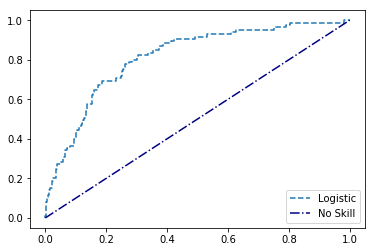

In [119]:
%matplotlib inline
pred = model.predict(X_test)
prob = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_test))
print(cm(pred,y_test))
print('accuracy',acc(pred,y_test))
print('precision',precision_score(pred,y_test))
print('recall',recall_score(pred,y_test))

In [120]:
cm(pred,y_test)

array([[565,  68],
       [ 17,  17]], dtype=int64)

### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC(random_state=0)

In [122]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

In [123]:
X_train.shape

(2666, 20)

In [124]:
model.fit(X_train,y_train)
pred = model.predict(X_train)
accuracy = acc(pred,y_train)
accuracy

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9924981245311327

In [125]:
pred = model.predict(X_test)
accuracy = acc(pred,y_test)
accuracy

0.9400299850074962

auc socre 0.9295030203185062
[[572  35]
 [  5  55]]
accuracy 0.9400299850074962
precision 0.6111111111111112
recall 0.9166666666666666


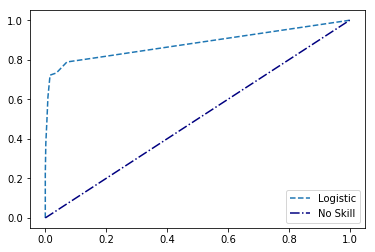

In [126]:
%matplotlib inline
pred = model.predict(X_test)
prob = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_test))
print(cm(pred,y_test))
print('accuracy',acc(pred,y_test))
print('precision',precision_score(pred,y_test))
print('recall',recall_score(pred,y_test))

### Now with 40% Split

In [127]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.4)

In [128]:
X_test.shape

(1334, 20)

In [129]:
model = RFC(random_state=0)
model.fit(X_train,y_train)
pred = model.predict(X_train)
accuracy = acc(pred,y_train)
accuracy

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9929964982491246

auc socre 0.9096741108354012
[[1126   83]
 [  14  111]]
accuracy 0.9272863568215892
precision 0.5721649484536082
recall 0.888


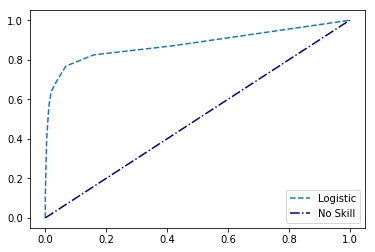

In [130]:
%matplotlib inline
pred = model.predict(X_test)
prob = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_test))
print(cm(pred,y_test))
print('accuracy',acc(pred,y_test))
print('precision',precision_score(pred,y_test))
print('recall',recall_score(pred,y_test))

### We have imbalanced dataset, so we will be making a balanced dataset

### Using Over Sampling

Text(0.5, 1.0, 'churn')

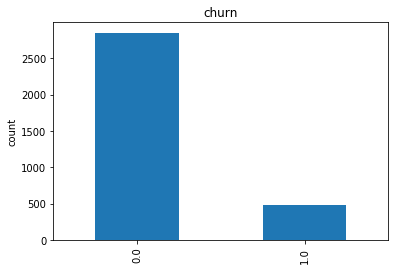

In [131]:
dataset.churn.value_counts().plot.bar()
plt.ylabel('count')
plt.title('churn')

In [132]:
churn_true = dataset[dataset['churn']==1]
churn_false = dataset[dataset['churn']==0]

In [133]:
from imblearn.combine import SMOTETomek as OverSample

In [134]:
OS = OverSample(random_state=0)
X_res,y_res = OS.fit_sample(X,y)

In [135]:
X_res = pd.DataFrame(X_res)

Text(0.5, 1.0, 'churn')

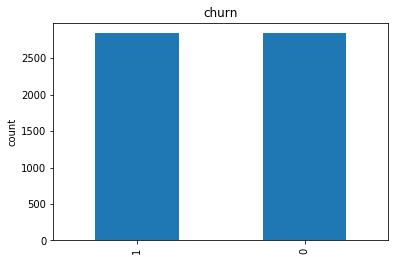

In [136]:
pd.DataFrame(y_res)[0].value_counts().plot.bar()
plt.ylabel('count')
plt.title('churn')

In [137]:
from collections import Counter
print('original dataset shape{}'.format(Counter(y)))
print('new dataset shape{}'.format(Counter(y_res)))

original dataset shapeCounter({0: 2850, 1: 483})
new dataset shapeCounter({0: 2841, 1: 2841})


In [138]:
# from imblearn.over_sampling import RandomOverSampler
# os = RandomOverSampler(ratio=1)

In [139]:
X_train,X_test,y_train,y_test = tts(X_res,y_res,test_size=0.4)

In [140]:
pd.DataFrame(y_test)[0].value_counts()

0    1152
1    1121
Name: 0, dtype: int64

In [141]:
model = RFC(random_state=0)
model.fit(X_train,y_train)
pred = model.predict(X_train)
accuracy = acc(pred,y_train)
accuracy

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.997946611909651

In [142]:
from sklearn.metrics import confusion_matrix as cm
cm(pred,y_train)

array([[1689,    7],
       [   0, 1713]], dtype=int64)

auc socre 0.9497055609707641
[[1114   78]
 [  38 1043]]
accuracy 0.9489661240651122
precision 0.9304192685102587
recall 0.9648473635522664


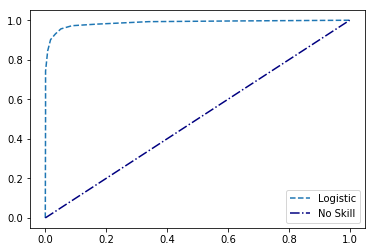

In [143]:
%matplotlib inline
pred = model.predict(X_test)
prob = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_test))
print(cm(pred,y_test))
print('accuracy',acc(pred,y_test))
print('precision',precision_score(pred,y_test))
print('recall',recall_score(pred,y_test))

In [477]:
pd.DataFrame(y_test)[0].value_counts()

0.0    1141
1.0    1135
Name: 0, dtype: int64

### Using Under Sampling

In [478]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state=0)
X_res, y_res = nm.fit_sample(X,y)

In [485]:
y.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [486]:
from collections import Counter
print('original dataset shape{}'.format(Counter(y)))
print('new dataset shape{}'.format(Counter(y_res)))

original dataset shapeCounter({0.0: 2850, 1.0: 483})
new dataset shapeCounter({0.0: 483, 1.0: 483})


C:\Users\shash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


auc socre 0.9958932238193018
[[483   4]
 [  0 479]]
accuracy 0.9958592132505176
precision 0.9917184265010351
recall 1.0


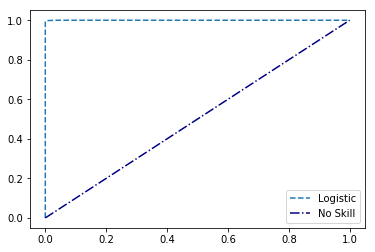

In [487]:
model = RFC(random_state=0)
model.fit(X_res,y_res)
%matplotlib inline
pred = model.predict(X_res)
prob = model.predict_proba(X_res)
fpr,tpr,thresh = roc_curve(y_res,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_res))
print(cm(pred,y_res))
print('accuracy',acc(pred,y_res))
print('precision',precision_score(pred,y_res))
print('recall',recall_score(pred,y_res))

In [488]:
cm(pred,y_res)

array([[483,   4],
       [  0, 479]], dtype=int64)

# PCA with Logistic Regression and Random Forest

In [489]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [490]:
pd.DataFrame(y)

,churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [506]:
X_pca = pd.DataFrame(pca.fit_transform(X),columns=['First','Second'])
dataset_pca = X_pca.merge(pd.DataFrame(y),left_index=True,right_index=True,how='left')

In [534]:
model = RFC(n_estimators=10,random_state=0)
# model = LR()

In [535]:
X_pca_train,X_pca_test,y_pca_train,y_pca_test = tts(X_pca,y,test_size=0.2)

In [536]:
X_pca_train.shape

(2666, 2)

In [537]:
model.fit(X_pca_train,y_pca_train)
print(cm(model.predict(X_pca_train),y_pca_train))
print(acc(model.predict(X_pca_train),y_pca_train))

[[2289   47]
 [   1  329]]
0.9819954988747187


auc socre 0.6504174120453191
[[536  88]
 [ 24  19]]
accuracy 0.8320839580209896
precision 0.17757009345794392
recall 0.4418604651162791


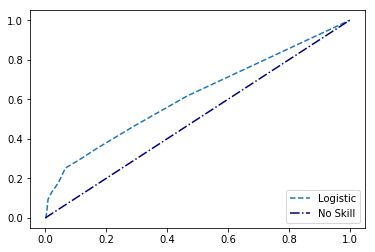

In [538]:
%matplotlib inline
pred = model.predict(X_pca_test)
prob = model.predict_proba(X_pca_test)
fpr,tpr,thresh = roc_curve(y_pca_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_pca_test))
print(cm(pred,y_pca_test))
print('accuracy',acc(pred,y_pca_test))
print('precision',precision_score(pred,y_pca_test))
print('recall',recall_score(pred,y_pca_test))

### Decision Tree Classifier

In [644]:
from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
model = DecisionTreeClassifier(criterion='entropy')

In [645]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3)

auc socre 1.0
[[1989    0]
 [   0  344]]
accuracy 1.0
precision 1.0
recall 1.0


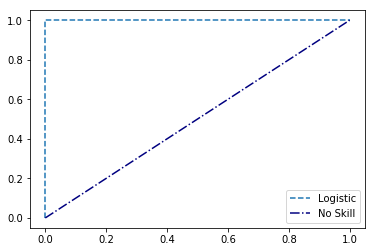

In [646]:
model.fit(X_train,y_train)
pred = model.predict(X_train)
%matplotlib inline
prob = model.predict_proba(X_train)
fpr,tpr,thresh = roc_curve(y_train,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_train))
print(cm(pred,y_train))
print('accuracy',acc(pred,y_train))
print('precision',precision_score(pred,y_train))
print('recall',recall_score(pred,y_train))

auc socre 0.83
[[816  34]
 [ 45 105]]
accuracy 0.921
precision 0.7553956834532374
recall 0.7


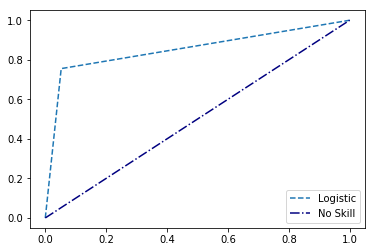

In [647]:
pred = model.predict(X_test)
%matplotlib inline
prob = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_test))
print(cm(pred,y_test))
print('accuracy',acc(pred,y_test))
print('precision',precision_score(pred,y_test))
print('recall',recall_score(pred,y_test))

### KNN Algorithm

In [636]:
from sklearn.neighbors import KNeighborsClassifier as knn
model = knn()

In [640]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3)

auc socre 0.883149345944593
[[2007  259]
 [   8   59]]
accuracy 0.8855550792970425
precision 0.18553459119496854
recall 0.8805970149253731


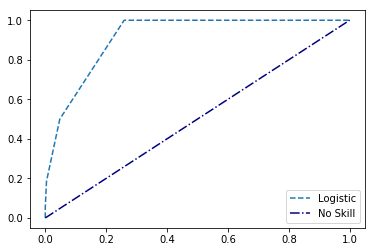

In [641]:
model.fit(X_train,y_train)
pred = model.predict(X_train)
%matplotlib inline
prob = model.predict_proba(X_train)
fpr,tpr,thresh = roc_curve(y_train,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_train))
print(cm(pred,y_train))
print('accuracy',acc(pred,y_train))
print('precision',precision_score(pred,y_train))
print('recall',recall_score(pred,y_train))

auc socre 0.6255161271019088
[[825 158]
 [ 10   7]]
accuracy 0.832
precision 0.04242424242424243
recall 0.4117647058823529


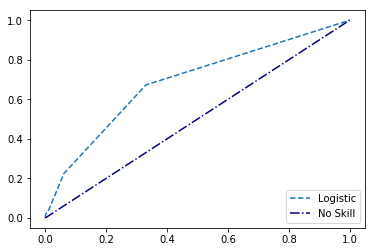

In [642]:
pred = model.predict(X_test)
%matplotlib inline
prob = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_test))
print(cm(pred,y_test))
print('accuracy',acc(pred,y_test))
print('precision',precision_score(pred,y_test))
print('recall',recall_score(pred,y_test))

### Naive Bayes

In [649]:
from sklearn.naive_bayes import GaussianNB as nb
model = nb()

In [650]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3)

auc socre 0.7226649532401299
[[1820  162]
 [ 166  185]]
accuracy 0.8594084869267038
precision 0.5331412103746398
recall 0.5270655270655271


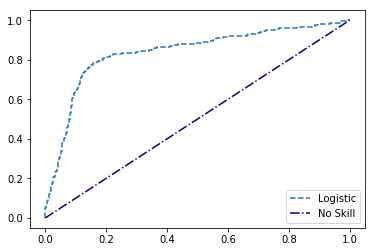

In [652]:
model.fit(X_train,y_train)
pred = model.predict(X_train)
%matplotlib inline
prob = model.predict_proba(X_train)
fpr,tpr,thresh = roc_curve(y_train,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_train))
print(cm(pred,y_train))
print('accuracy',acc(pred,y_train))
print('precision',precision_score(pred,y_train))
print('recall',recall_score(pred,y_train))

auc socre 0.7427159317841895
[[802  59]
 [ 62  77]]
accuracy 0.879
precision 0.5661764705882353
recall 0.5539568345323741


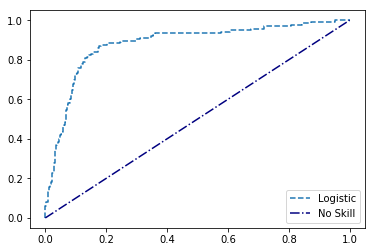

In [653]:
pred = model.predict(X_test)
%matplotlib inline
prob = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_test))
print(cm(pred,y_test))
print('accuracy',acc(pred,y_test))
print('precision',precision_score(pred,y_test))
print('recall',recall_score(pred,y_test))

### XGBoost Classifier

In [656]:
from xgboost import XGBClassifier as xgb

In [657]:
model = xgb()

auc socre 0.9697296930182017
[[1978   67]
 [   8  280]]
accuracy 0.9678525503643378
precision 0.8069164265129684
recall 0.9722222222222222


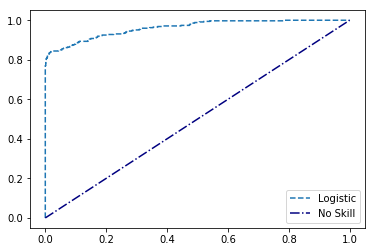

In [659]:
model.fit(X_train,y_train)
pred = model.predict(X_train)
%matplotlib inline
prob = model.predict_proba(X_train)
fpr,tpr,thresh = roc_curve(y_train,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_train))
print(cm(pred,y_train))
print('accuracy',acc(pred,y_train))
print('precision',precision_score(pred,y_train))
print('recall',recall_score(pred,y_train))

auc socre 0.9321617064580818
[[853  34]
 [ 11 102]]
accuracy 0.955
precision 0.75
recall 0.9026548672566371


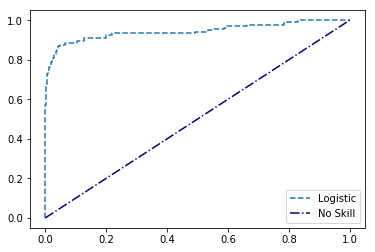

In [663]:
pred = model.predict(X_test)
%matplotlib inline
prob = model.predict_proba(X_test)
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
plt.legend(loc="lower right")
print('auc socre',roc_auc_score(pred,y_test))
print(cm(pred,y_test))
print('accuracy',acc(pred,y_test))
print('precision',precision_score(pred,y_test))
print('recall',recall_score(pred,y_test))